In [1]:
# Dependencies
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path

In [2]:
# Save path to the data set as a variable.
diabetes_file = Path("diabetes_prediction_dataset.csv")

# Read Data
diabetes_df = pd.read_csv(diabetes_file)
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# Add info for obesity based on BMI (https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)
diabetes_df["bmi_category"]=np.select(
    [
        diabetes_df["bmi"].between(0,18.50),
        diabetes_df["bmi"].between(18.51, 24.99),
        diabetes_df["bmi"].between(25.00, 29.99),
        diabetes_df["bmi"].between(30.00, 1000.00)
    ],
    [
        "Underweight",
        "Healthy Weight",
        "Overweight",
        "Obesity"
    ]
)
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category
0,Female,80.0,0,1,never,25.19,6.6,140,0,Overweight
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Overweight
2,Male,28.0,0,0,never,27.32,5.7,158,0,Overweight
3,Female,36.0,0,0,current,23.45,5.0,155,0,Healthy Weight
4,Male,76.0,1,1,current,20.14,4.8,155,0,Healthy Weight


In [11]:
diabetes_df = diabetes_df.loc[diabetes_df["age"]>=30,:]
diabetes_df["age"].min()

30.0

In [5]:
diabetes_df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
bmi_category            object
dtype: object

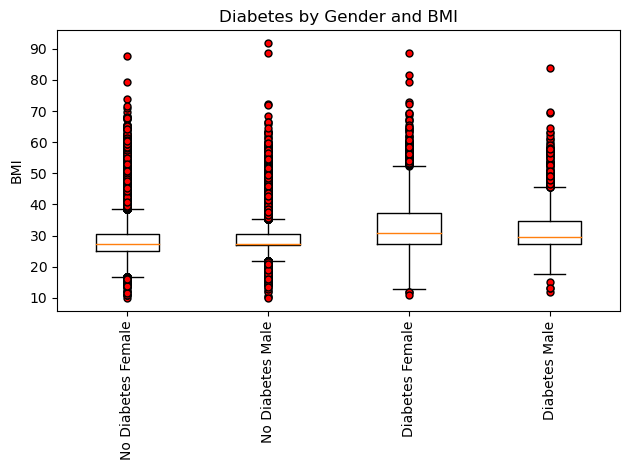

In [6]:
# Box Plot of BMI and Gender for Diabetics vs non Diabetics
x=[0, 1]
y=["Female", "Male"]

plot_data=[]

for diabetes in x:
    for gender in y:
        z_df = diabetes_df.loc[(diabetes_df["diabetes"]==diabetes) & (diabetes_df["gender"]==gender),:]
        plot_data.append(z_df["bmi"])
    
x_labels=["No Diabetes Female", "No Diabetes Male", "Diabetes Female", "Diabetes Male" ]
xticks=np.arange(1, len(x_labels)+1,1)
plt.boxplot(plot_data, flierprops=dict(markerfacecolor='r', markersize=5))
plt.title("Diabetes by Gender and BMI")
plt.ylabel("BMI")
plt.xticks(xticks, x_labels, rotation=90)
plt.tight_layout()
plt.savefig("bmi_gender.png")
plt.show()

In [7]:
# Bar Graph of bmi_category by gender

group_df=diabetes_df.groupby(["gender", "bmi_category", "diabetes"])

bar_df = pd.DataFrame(group_df["bmi"].count())
bar_df = bar_df.reset_index()
bar_df = bar_df.rename(columns={"bmi": "count"})
bar_df["bmi_category"] = pd.Categorical(bar_df["bmi_category"],["Underweight", "Healthy Weight", "Overweight", "Obesity"])
sorted_df = bar_df.sort_values(["gender", "bmi_category"])
sorted_df


,gender,bmi_category,diabetes,count
6,Female,Underweight,0,522
7,Female,Underweight,1,34
0,Female,Healthy Weight,0,8555
1,Female,Healthy Weight,1,416
4,Female,Overweight,0,17233
5,Female,Overweight,1,1573
2,Female,Obesity,0,9614
3,Female,Obesity,1,2280
14,Male,Underweight,0,123
15,Male,Underweight,1,7


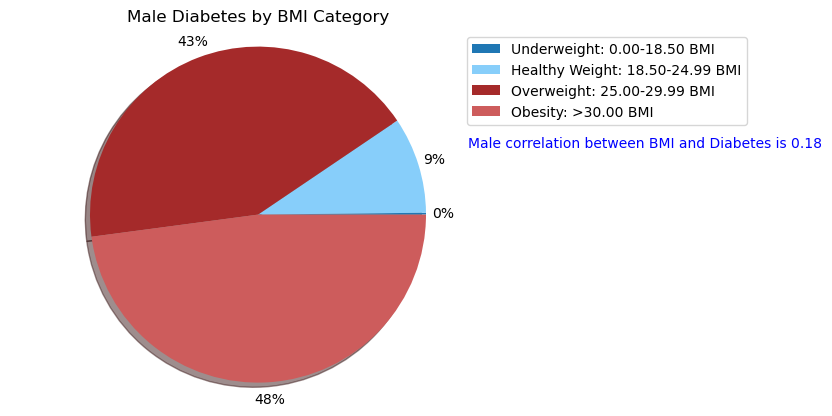

In [8]:
labels=["Underweight", "Healthy Weight", "Overweight", "Obesity"]
male_diabetes_df = sorted_df.loc[(sorted_df["gender"]=="Male") & (sorted_df["diabetes"]==1),:]
female_diabetes_df = sorted_df.loc[(sorted_df["gender"]=="Female") & (sorted_df["diabetes"]==1),:]
legend=["Underweight: 0.00-18.50 BMI", "Healthy Weight: 18.50-24.99 BMI", "Overweight: 25.00-29.99 BMI", "Obesity: >30.00 BMI"]

male=male_diabetes_df["count"]
female=female_diabetes_df["count"]

colors=["tab:blue", "lightskyblue", "brown", "indianred"]

explode=[0, 0, 0, 0]

plt.pie(male, explode=explode, colors=colors, autopct="%1.0f%%", pctdistance=1.1, shadow=True, startangle=0)
plt.title("Male Diabetes by BMI Category")
plt.legend(bbox_to_anchor=(1.5, 1.0),labels=legend,loc="upper right")
plt.axis("equal")

male_df=diabetes_df.loc[diabetes_df["gender"]=="Male",:]
dia_m=male_df.iloc[:,8]
bmi_m=male_df.iloc[:,5]
correlation=st.pointbiserialr(dia_m,bmi_m)
corr = (f"Male correlation between BMI and Diabetes is {round(correlation[0],2)}")

plt.annotate(corr, (1.25,0.4), fontsize=10, color="blue")
plt.savefig("male_by_bmi_cat.png", bbox_inches = "tight")
plt.show()

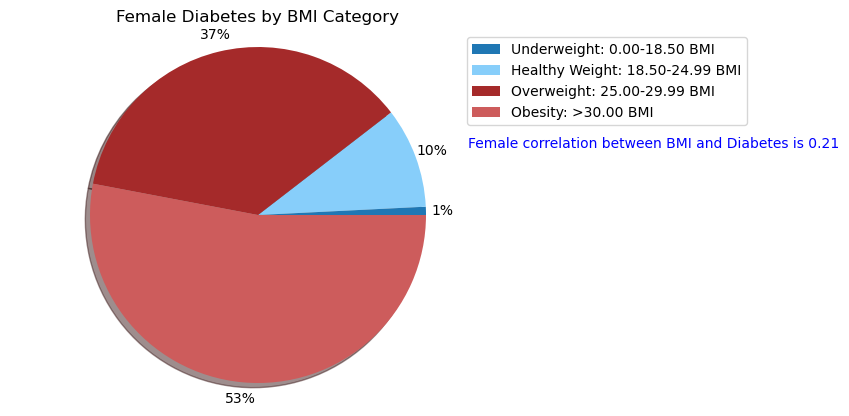

In [9]:
plt.pie(female, explode=explode, colors=colors, autopct="%1.0f%%", pctdistance=1.1, shadow=True, startangle=0)
plt.title("Female Diabetes by BMI Category")
plt.legend(bbox_to_anchor=(1.5, 1.0),labels=legend,loc="upper right")
plt.axis("equal")

female_df=diabetes_df.loc[diabetes_df["gender"]=="Female",:]
dia_f=female_df.iloc[:,8]
bmi_f=female_df.iloc[:,5]
correlation=st.pointbiserialr(dia_f,bmi_f)
corr = (f"Female correlation between BMI and Diabetes is {round(correlation[0],2)}")

plt.annotate(corr, (1.25,0.4), fontsize=10, color="blue")
plt.savefig("female_by_bmi_cat.png", bbox_inches = "tight")
plt.show()

In [10]:
#Correlations:

male_ov_ob = male_df.loc[male_df["bmi"] >= 25,:]
female_ov_ob = female_df.loc[female_df["bmi"] >= 25,:]

dia_m_ov_ob=male_ov_ob.iloc[:,8]
bmi_m_ov_ob=male_ov_ob.iloc[:,5]
correlation1=st.pointbiserialr(dia_m_ov_ob,bmi_m_ov_ob)
print(f"Male correlation between BMI and Diabetes for Overweight and Obese is {round(correlation1[0],2)}")

dia_f_ov_ob=female_ov_ob.iloc[:,8]
bmi_f_ov_ob=female_ov_ob.iloc[:,5]
correlation2=st.pointbiserialr(dia_f_ov_ob,bmi_f_ov_ob)
print(f"Female correlation between BMI and Diabetes for Overweight and Obese is {round(correlation2[0],2)}")

Male correlation between BMI and Diabetes for Overweight and Obese is 0.19
Female correlation between BMI and Diabetes for Overweight and Obese is 0.19
